Temps de calcul : 0.103 secondes


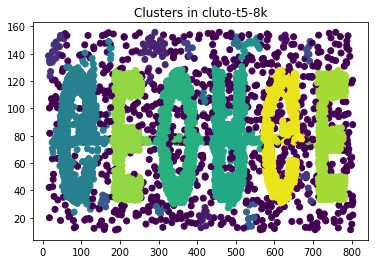

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
from scipy.io import arff
import numpy as np
import time
import matplotlib.pyplot as plt
import hdbscan

### 4 HDBSCAN

name = "cluto-t5-8k"
file_path = './clustering-benchmark-master/src/main/resources/datasets/artificial/' + name + ".arff"

# Charge le jeu de donnée :
data = arff.loadarff(open(file_path,'r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

### Calcule les Silhouette-score et les temps d'exécution pour divers min_cluster
# temps = []
# mesures = []
# nb_cluster_size = range(2,50)
# for i in nb_cluster_size:
#     t1 = time.time()
#     ### Appel de la méthode de clusterization
#     model = hdbscan.HDBSCAN(min_cluster_size=i).fit(npliste)
#     t2 = time.time()
#     labels = model.labels_
#     mesure = metrics.silhouette_score(npliste, labels, metric='euclidean')
#     temps += [t2-t1]
#     mesures += [mesure]
# print("Mesures :",[round(num, 3) for num in mesures])
# print("Temps :",[round(num, 3) for num in temps])
# ### Trouve le nombre de cluster maximisant Silhouette-Score
# min_cluster_size_max_score = mesures.index(max(mesures))+2
# print("Min_cluster_size maximisant Silhouette : ",min_cluster_size_max_score)
# Calcul les clusters pour le nombre maximisant silhouette-score
t1 = time.time()
# pred = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size_max_score,min_samples=15).fit_predict(npliste)
pred = hdbscan.HDBSCAN(min_samples=None).fit_predict(npliste)
t2 = time.time()
print("Temps de calcul : " + str(round(t2-t1,3)) + " secondes")

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in " + name)
plt.show()


epsilon :  18.255
min_sample :  120
Temps de calcul : 0.05 secondes


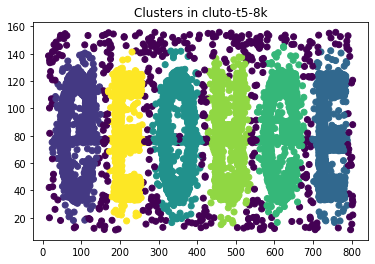

In [63]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.io import arff
import numpy as np
import time
import matplotlib.pyplot as plt

### 4 DBSCAN

name = "cluto-t5-8k"
#name = "dense-disk-5000"
file_path = './clustering-benchmark-master/src/main/resources/datasets/artificial/' + name + ".arff"

# Charge le jeu de donnée :
data = arff.loadarff(open(file_path,'r'))[0]
# Garde uniquement les 2 premières colonnes du jeu de donnée
liste = []
for i in range(0, len(data)-1):
    liste += [[data[i][0],data[i][1]]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste = np.array([x for x in liste])

nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(npliste)
distances, indices = nbrs.kneighbors(npliste)
#print(distances)

# Garde uniquement la colonne correspondant aux distances
liste2 = []
for i in range(0, len(distances)-1):
    liste2 += [distances[i][1]]
# Transforme la liste de donnée en une liste de liste utilisable par numpy
npliste2 = np.array([x for x in liste2])
#print(npliste2)

epsilon = 0.98*max(npliste2)
print("epsilon : ",round(epsilon,3))
min_sample = 120
print("min_sample : ",min_sample)

# Calcul les clusters pour le nombre attendus de cluster
t1 = time.time()
pred = DBSCAN(eps=epsilon, min_samples=min_sample).fit_predict(npliste)
t2 = time.time()
print("Temps de calcul : " + str(round(t2-t1,3)) + " secondes")

# Affiche le résultat de la clusterisation
#plt.figure(figsize=(10, 10))
plt.figure()
plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
plt.title("Clusters in " + name)
plt.show()


In [174]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
import time
import os
import csv
import pandas as pd

### 2 Clustering aggloméré (metrics)

def clusteringOnFolderAgglo(name,n,m):
    
    ### Charge le jeu de donnée
#     rawdata = pd.read_csv(file_path, sep="\t")
#     data = rawdata.drop(columns=['C'])
#     print(data)
    csvfile = open('dataset/' + name + '.data','r')
    data = []
    try:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = '\t')]
    except Exception:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = ' ')]
    
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])

    ### Calcule le temps d'exécution
    t1 = time.time()
    ### Appel de la méthode de clusterization
    pred = AgglomerativeClustering(n_clusters=n, affinity='euclidean',linkage=m,connectivity=None).fit_predict(npliste)
    t2 = time.time()
    temps = round(t2-t1,3)
    print("Temps : ",temps)

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in " + name
    plt.title(cluster_name)
    plt.show()

['a', 'h', 't', 'tr', 'zgn', 'zgo']
Temps :  0.008


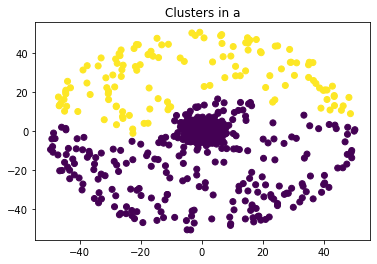

Temps :  0.002


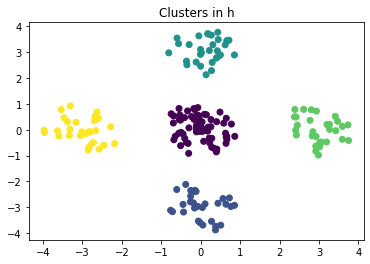

Temps :  0.004


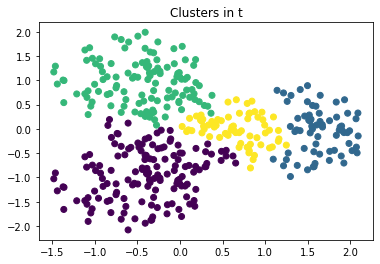

Temps :  1.68


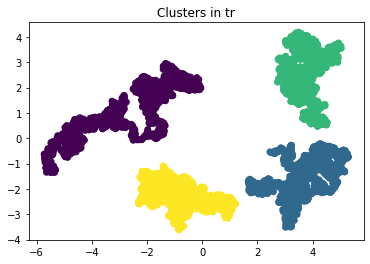

Temps :  0.001


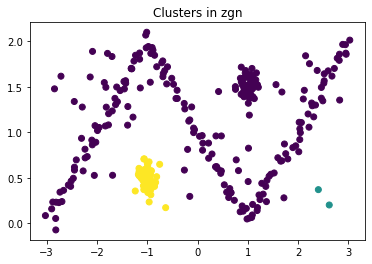

Temps :  0.001


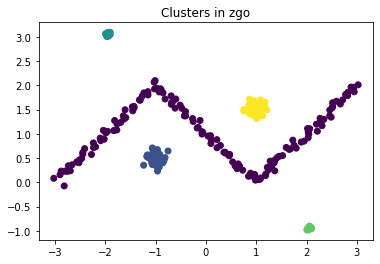

In [175]:
l=os.listdir('./dataset/')
li=[i for i in l if 'data' in i]
lis=[x.split('.')[0] for x in l]
print(lis)
nb_clusters = [2,5,4,4,3,5]
modes = ['complete','ward','ward','ward','single','single']
n = 0
for i in lis:
    try:
        clusteringOnFolderAgglo(i,nb_clusters[n],modes[n])
        n += 1
    except Exception:
        pass

In [180]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import KMeans
import time
import os
import csv
import pandas as pd

### 2 Clustering aggloméré (metrics)

def clusteringOnFolderKmeans(name,n):
    
    ### Charge le jeu de donnée
#     rawdata = pd.read_csv(file_path, sep="\t")
#     data = rawdata.drop(columns=['C'])
#     print(data)
    csvfile = open('dataset/' + name + '.data','r')
    data = []
    try:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = '\t')]
    except Exception:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = ' ')]
    
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])

    ### Calcule le temps d'exécution
    t1 = time.time()
    ### Appel de la méthode de clusterization
    pred = KMeans(n_clusters=n, random_state=0).fit_predict(npliste)
    t2 = time.time()
    temps = round(t2-t1,3)
    print("Temps : ",temps)

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in " + name
    plt.title(cluster_name)
    plt.show()

['a', 'h', 't', 'tr', 'zgn', 'zgo']
Temps :  0.021


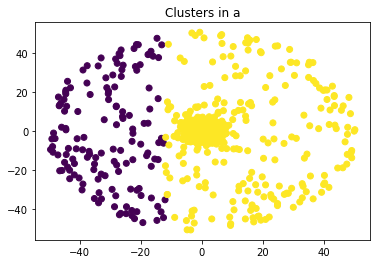

Temps :  0.013


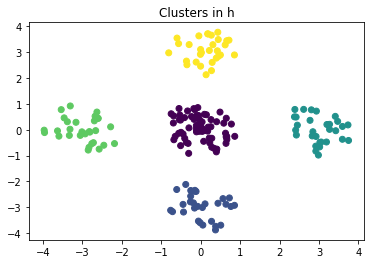

Temps :  0.024


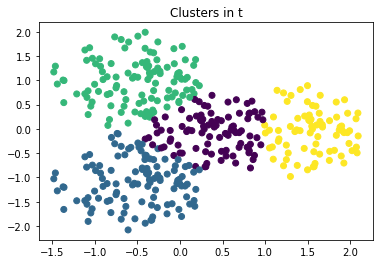

Temps :  0.046


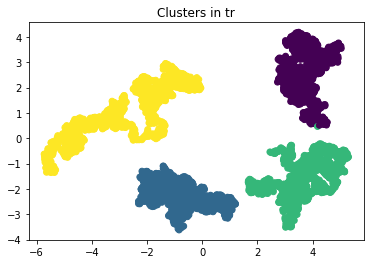

Temps :  0.016


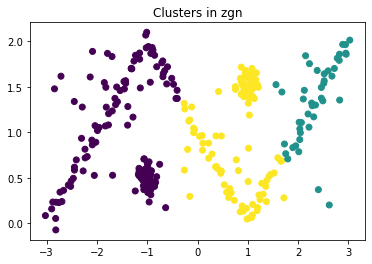

Temps :  0.021


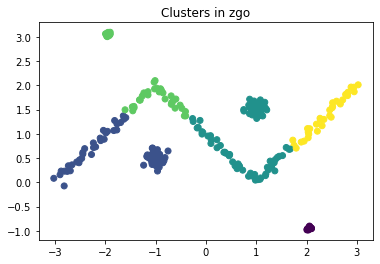

In [182]:
l=os.listdir('./dataset/')
li=[i for i in l if 'data' in i]
lis=[x.split('.')[0] for x in l]
print(lis)
nb_clusters = [2,5,4,4,3,5]
n = 0
for i in lis:
    clusteringOnFolderKmeans(i,nb_clusters[n])
    n += 1

In [185]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import time
import os
import csv
import pandas as pd

### 2 Clustering aggloméré (metrics)

def clusteringOnFolderDBSCAN(name,ms):
    
    ### Charge le jeu de donnée
#     rawdata = pd.read_csv(file_path, sep="\t")
#     data = rawdata.drop(columns=['C'])
#     print(data)
    csvfile = open('dataset/' + name + '.data','r')
    data = []
    try:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = '\t')]
    except Exception:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = ' ')]
    
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])

    nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(npliste)
    distances, indices = nbrs.kneighbors(npliste)

    # Garde uniquement la colonne correspondant aux distances
    liste2 = []
    for i in range(0, len(distances)-1):
        liste2 += [distances[i][1]]
    # Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste2 = np.array([x for x in liste2])
    #print(npliste2)

    epsilon = 0.98*max(npliste2)
    
    ### Calcule le temps d'exécution
    t1 = time.time()
    ### Appel de la méthode de clusterization
    pred = DBSCAN(eps=epsilon, min_samples=ms).fit_predict(npliste)
    t2 = time.time()
    temps = round(t2-t1,3)
    print("Temps : ",temps)

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in " + name
    plt.title(cluster_name)
    plt.show()

['a', 'h', 't', 'tr', 'zgn', 'zgo']
Temps :  0.004


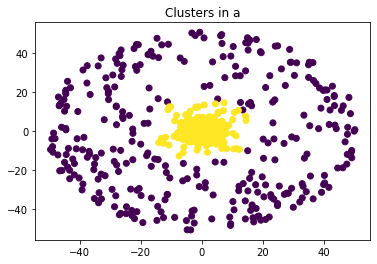

Temps :  0.001


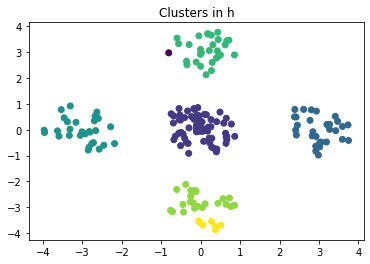

Temps :  0.002


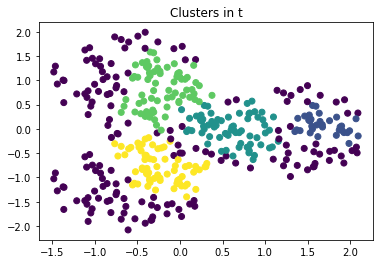

Temps :  0.035


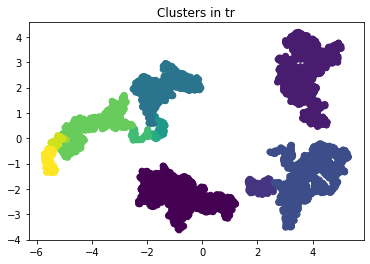

Temps :  0.002


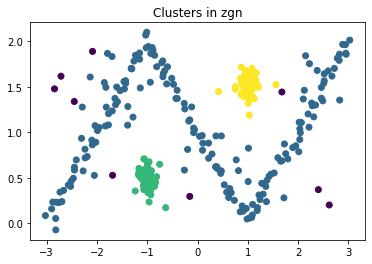

Temps :  0.001


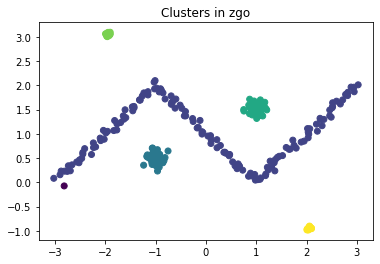

In [231]:
l=os.listdir('./dataset/')
li=[i for i in l if 'data' in i]
lis=[x.split('.')[0] for x in l]
print(lis)
min_samples = [100,2,10,1,10,5]
n = 0
for i in lis:
    clusteringOnFolderDBSCAN(i,min_samples[n])
    n += 1

In [232]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import time
import os
import csv
import pandas as pd

### 2 Clustering aggloméré (metrics)

def clusteringOnFolderHDBSCAN(name,ms):
    
    ### Charge le jeu de donnée
#     rawdata = pd.read_csv(file_path, sep="\t")
#     data = rawdata.drop(columns=['C'])
#     print(data)
    csvfile = open('dataset/' + name + '.data','r')
    data = []
    try:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = '\t')]
    except Exception:
        data += [list(map(float, point)) for point in csv.reader(csvfile, delimiter = ' ')]
    
    ### Garde uniquement les 2 premières colonnes du jeu de donnée
    liste = []
    for i in range(0, len(data)-1):
        liste += [[data[i][0],data[i][1]]]
    ### Transforme la liste de donnée en une liste de liste utilisable par numpy
    npliste = np.array([x for x in liste])
    
    ### Calcule le temps d'exécution
    t1 = time.time()
    ### Appel de la méthode de clusterization
    pred = hdbscan.HDBSCAN(min_samples=ms).fit_predict(npliste)
    t2 = time.time()
    temps = round(t2-t1,3)
    print("Temps : ",temps)

    ### Calcule les clusters pour le nombre maximisant le Silhouette-Score
    ### Appel de la méthode de clusterization
    ### Affiche la clusterisations
    #plt.figure(figsize=(10, 10))
    plt.figure()
    plt.scatter(npliste[:, 0], npliste[:, 1], c=pred)
    cluster_name = "Clusters in " + name
    plt.title(cluster_name)
    plt.show()

['a', 'h', 't', 'tr', 'zgn', 'zgo']
Temps :  0.011


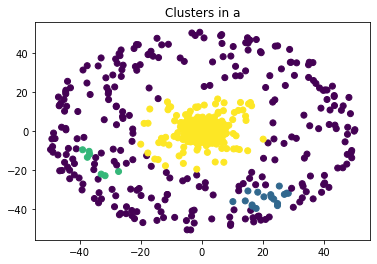

Temps :  0.003


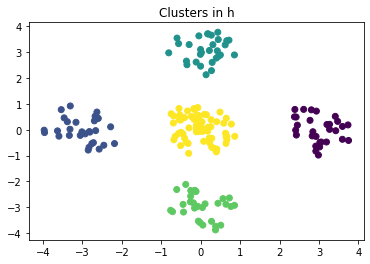

Temps :  0.005


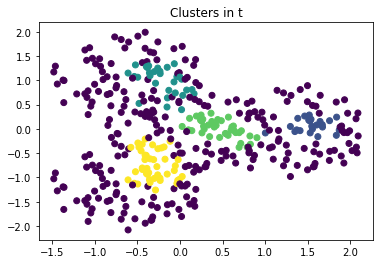

Temps :  0.15


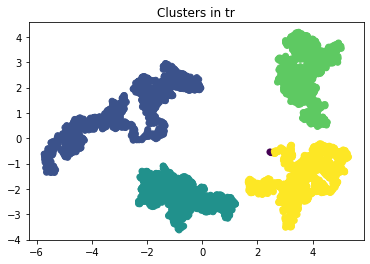

Temps :  0.004


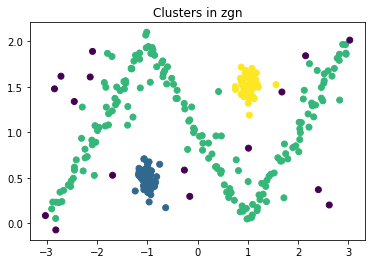

Temps :  0.004


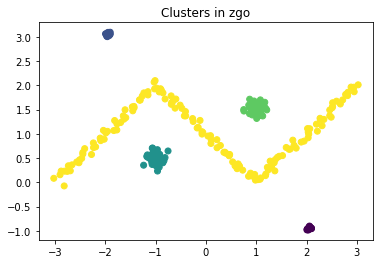

In [299]:
l=os.listdir('./dataset/')
li=[i for i in l if 'data' in i]
lis=[x.split('.')[0] for x in l]
print(lis)
min_samples = [40,5,20,70,10,5]
n = 0
for i in lis:
    clusteringOnFolderHDBSCAN(i,min_samples[n])
    n += 1